In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Alcohol_Sales.csv", index_col="DATE", parse_dates=True)

In [3]:
data.columns = ["Sales"]
data.index.freq = 'MS'
data.head()

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [4]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [5]:
N_test = 12
X_train = data["Sales"].iloc[:-N_test]
X_test = data["Sales"].iloc[-N_test:]

In [6]:
# Using additive Holt-Winters to predict the sales data
es = ExponentialSmoothing(X_train, initialization_method='legacy-heuristic', 
                          trend='add', 
                          seasonal='add', 
                          seasonal_periods=12)
fit_es = es.fit()

In [9]:
data['predictions_add'] = fit_es.predict(start=data.index[0], end=data.index[-1])

<AxesSubplot:xlabel='DATE'>

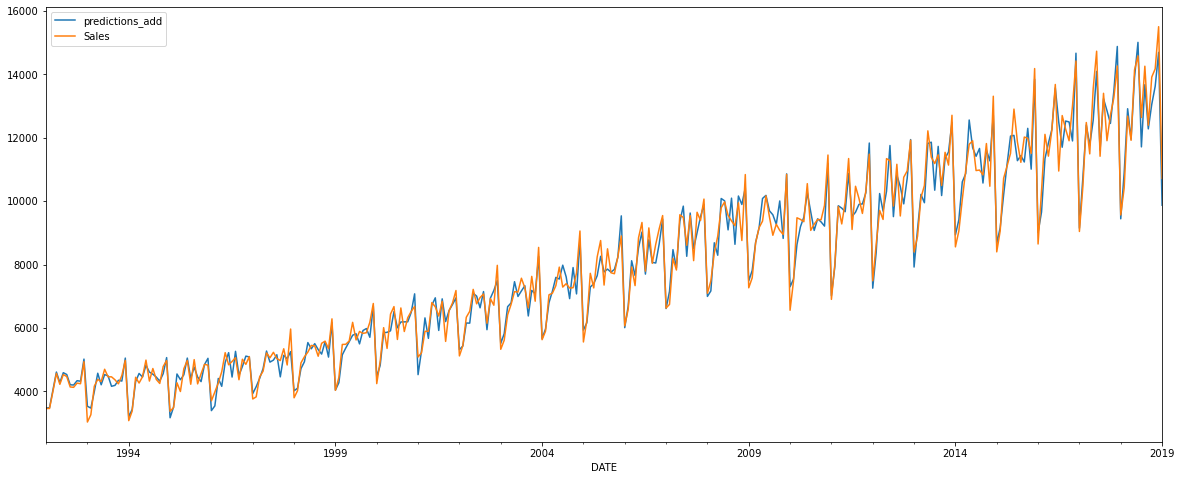

In [10]:
data[['predictions_add', 'Sales']].plot(figsize=(20,8))

## Exercise: Compare Naive Forecast, Simple Exponential Smoothing and Holt-Winters models

Using the last 12 months as your test set, compare the forecasting abilities of these models using the R2-Score and RMSE